# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, KernelPCA

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
climate_data = pd.read_csv('/content/drive/MyDrive/MCM Practicum/Implementation/datasets/district_spi_data.csv')
climate_data.head()

year_month     PS   QV2M   RH2M    WD2M  WS2M   WD10M  WS10M  GWETTOP  \
0      200101  94.46   5.68  34.00   81.75  1.52   76.00   2.37     0.30   
1      200102  94.37   3.72  20.81  327.81  1.87  331.56   2.89     0.16   
2      200103  94.26   6.47  31.31  284.75  2.63  286.69   3.66     0.14   
3      200104  94.14   7.45  26.31  345.19  2.10  343.81   2.90     0.18   
4      200105  93.89  11.47  42.81  272.44  4.43  272.44   5.75     0.17   

   GWETPROF  ...  year_month_formatted      spi1  spi1_color  \
0       0.6  ...               2001-01  0.046818       green   
1       0.6  ...               2001-02 -0.180012         red   
2       0.6  ...               2001-03 -0.293911         red   
3       0.6  ...               2001-04  0.017822       green   
4       0.6  ...               2001-05 -0.462521         red   

   spi1_drought_category      spi3  spi3_color  spi3_drought_category  \
0            Near Normal  0.038293       green            Near Normal   
1            Near Normal  0.038293       green            Near Normal   
2            Near Normal -0.712338         red            Near Normal   
3            Near Normal -0.642136         red            Near Normal   
4            Near Normal -0.800249         red            Near Normal   

       spi6  spi6_color spi6_drought_category  
0  0.008836       green           Near Normal  
1  0.008836       green           Near Normal  
2  0.008836       green           Near Normal  
3  0.008836       green           Near Normal  
4  0.008836       green           Near Normal  

[5 rows x 35 columns]

# Overall EDA

In [ ]:
may_flights = flights.query("month == 'May'")
sns.lineplot(data=climate_data, x="year", y="passengers")

In [ ]:
climate_data['spi1_drought_category'].value_counts()

Near Normal       6702
Moderately Wet     849
Moderately Dry     499
Very Wet           441
Severely Dry       229
Extremely Dry      210
Extremely Wet      142
Name: spi1_drought_category, dtype: int64

In [ ]:
climate_data['spi3_drought_category'].value_counts()

Near Normal       6372
Moderately Wet     836
Moderately Dry     756
Very Wet           439
Severely Dry       291
Extremely Dry      248
Extremely Wet      130
Name: spi3_drought_category, dtype: int64

In [ ]:
climate_data['spi6_drought_category'].value_counts()

Near Normal       6312
Moderately Wet     845
Moderately Dry     805
Very Wet           427
Severely Dry       300
Extremely Dry      242
Extremely Wet      141
Name: spi6_drought_category, dtype: int64

In [ ]:
climate_data.groupby(['year', 'district', 'spi1_drought_category'])['spi3'].mean()

year  district    spi1_drought_category
2001  Ahmednagar  Moderately Dry          -1.266613
                  Near Normal             -0.324862
      Akola       Near Normal              0.041144
                  Severely Dry            -1.071286
                  Very Wet                 0.345552
                                             ...   
2021  Washim      Near Normal              0.310394
                  Very Wet                 1.388537
      Yavatmal    Moderately Wet           1.096130
                  Near Normal              0.061519
                  Very Wet                 0.726030
Name: spi3, Length: 2486, dtype: float64

# Feature Correlation

|PARAMETERS      |DESCRIPTION                                       |
|--              |--                                                |
|PS              |   Surface Pressure (kPa)                         |
|TS              |   Earth Skin Temperature (C)                     |
|T2M             |   Temperature at 2 Meters (C)                    |
|QV2M            |   Specific Humidity at 2 Meters (g/kg)           |
|RH2M            |   Relative Humidity at 2 Meters (%)              |   
|WD2M            |   Wind Direction at 2 Meters (Degrees)           |   
|WS2M            |   Wind Speed at 2 Meters (m/s)                   |
|T2MDEW          |   Dew/Frost Point at 2 Meters (C)                |
|T2MWET          |   Wet Bulb Temperature at 2 Meters (C)           |
|GWETTOP         |   Surface Soil Wetness (1)                       |
|GWETPROF        |   Profile Soil Moisture (1)                      |
|GWETROOT        |   Root Zone Soil Wetness (1)                     |
|WS2M_MAX        |   Wind Speed at 2 Meters Maximum (m/s)           |
|WS2M_MIN        |   Wind Speed at 2 Meters Minimum (m/s)           |
|WS2M_RANGE      |   Wind Speed at 2 Meters Range (m/s)             |
|PRECTOTCORR     |   Precipitation Corrected (mm/day)               |
|PRECTOTCORR_SUM |   Precipitation Corrected Sum (mm)               |

## Correlation of Features with SPI

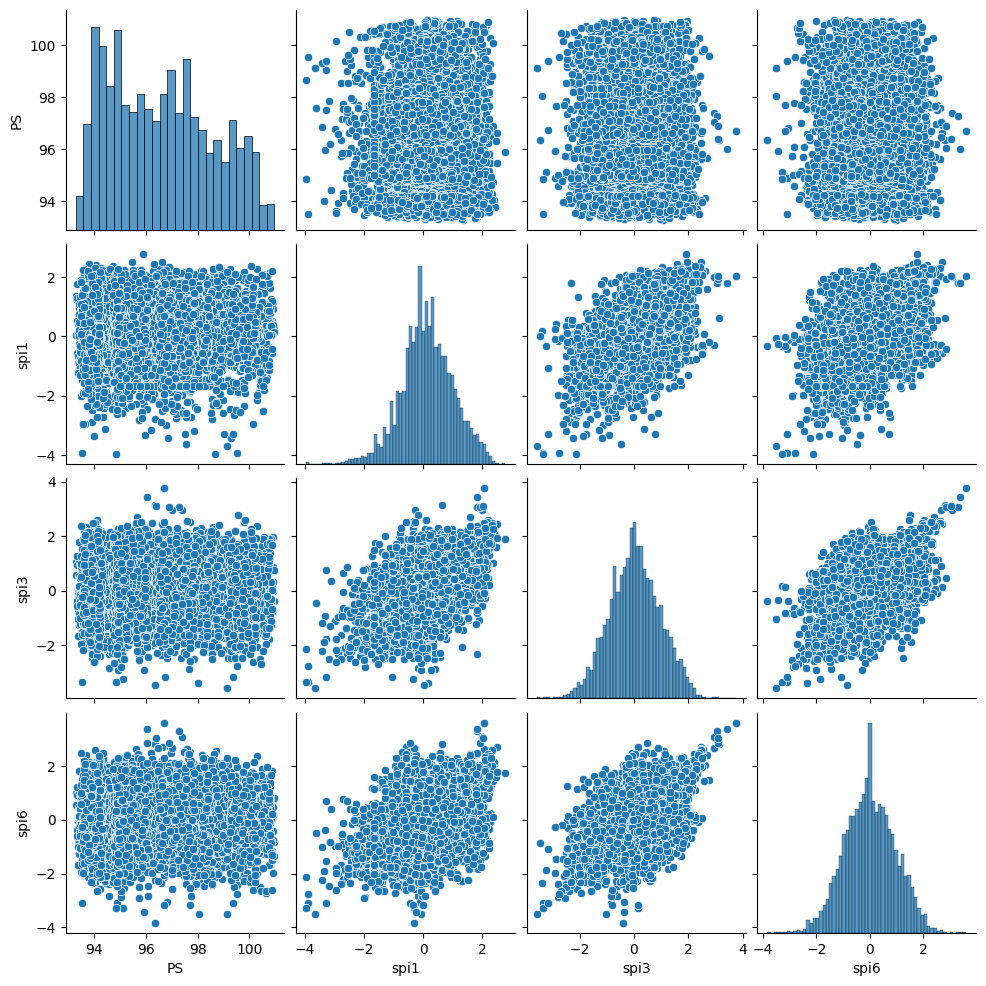

In [ ]:
sns.pairplot(climate_data[['PS', 'spi1', 'spi3', 'spi6']])

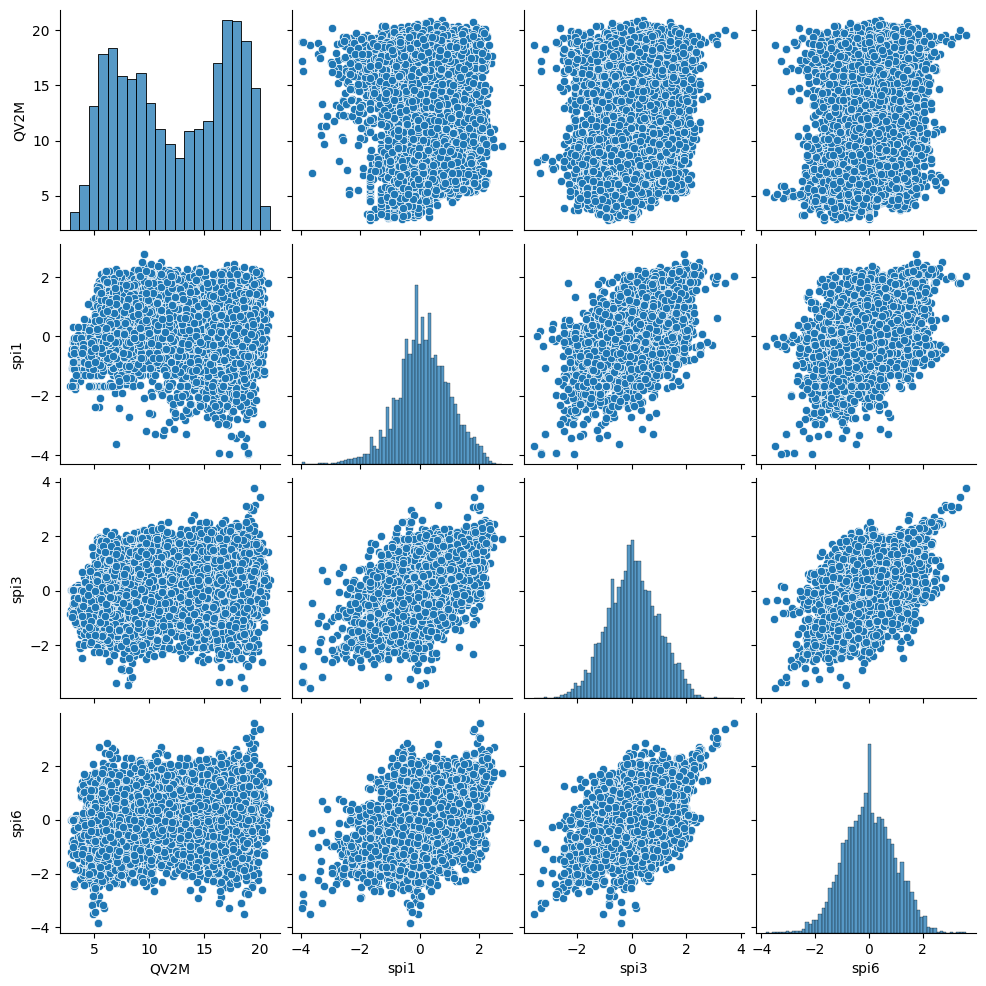

In [ ]:
sns.pairplot(climate_data[['QV2M', 'spi1', 'spi3', 'spi6']])

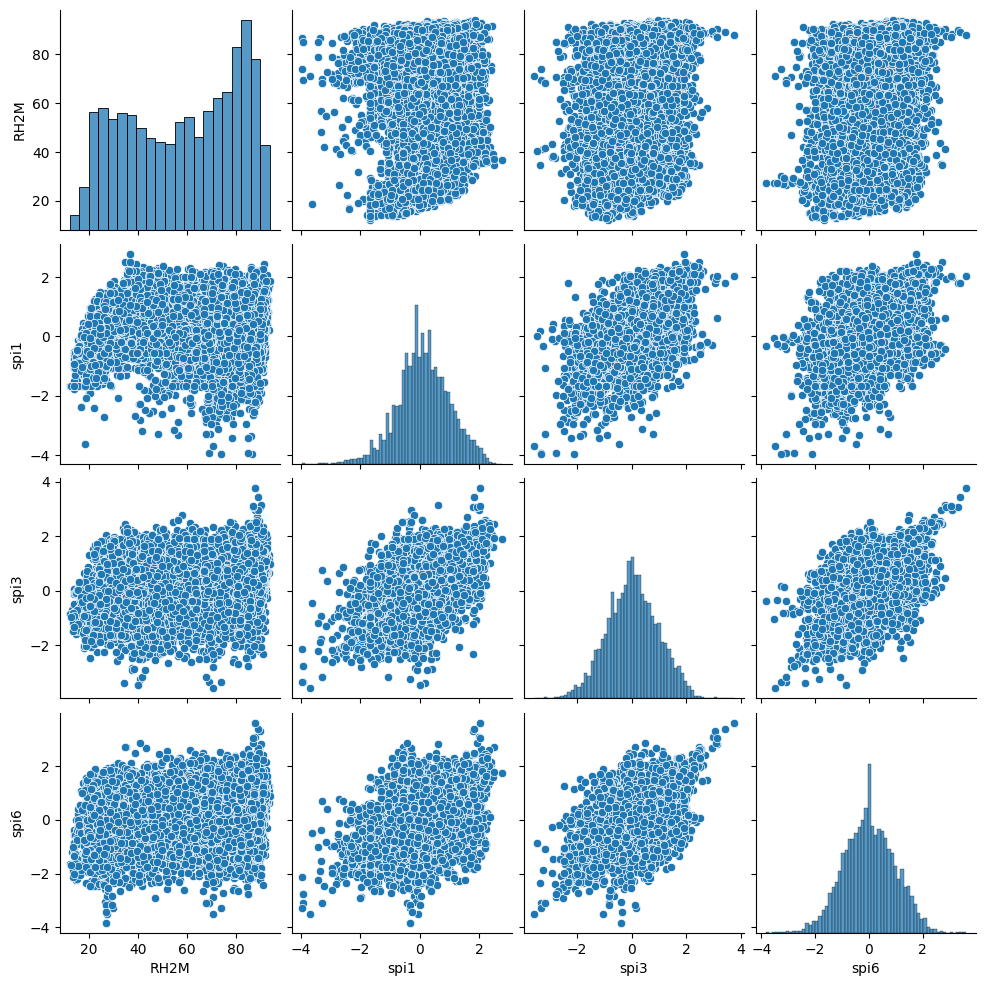

In [ ]:
sns.pairplot(climate_data[['RH2M', 'spi1', 'spi3', 'spi6']])

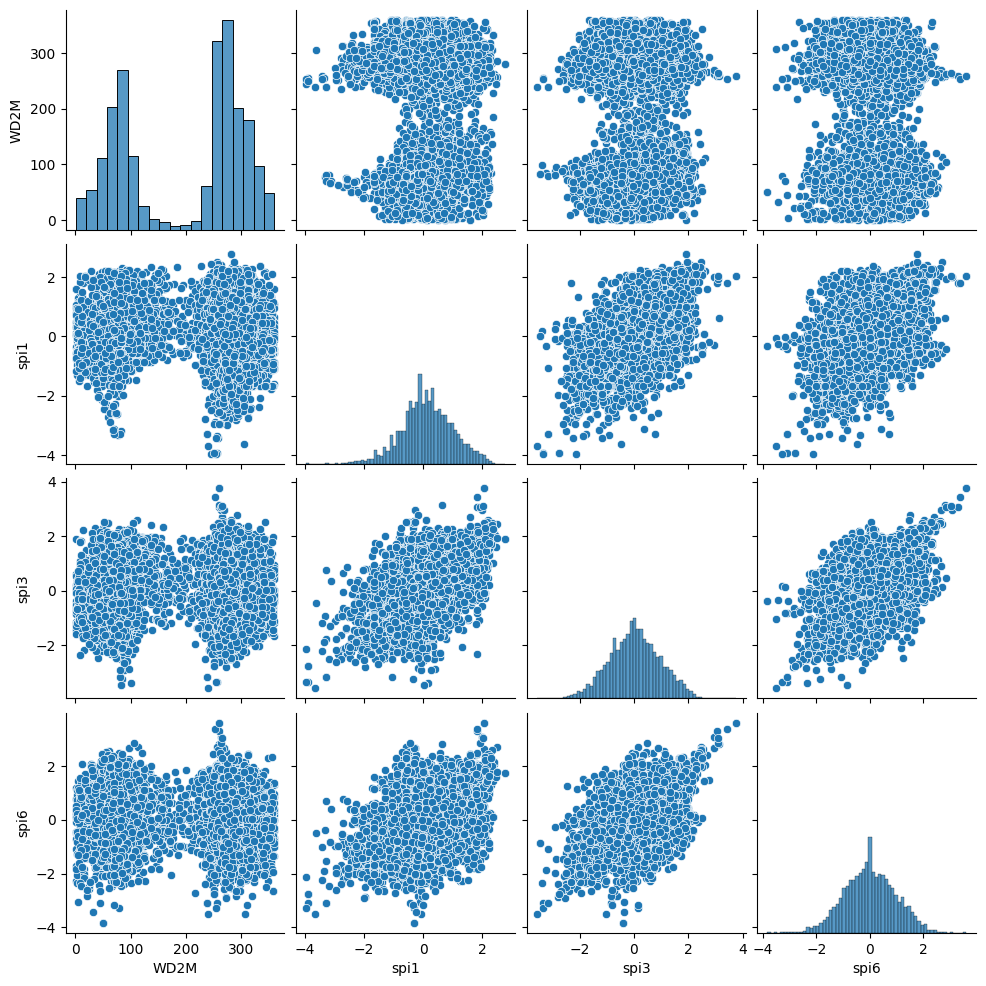

In [ ]:
sns.pairplot(climate_data[['WD2M', 'spi1', 'spi3', 'spi6']])

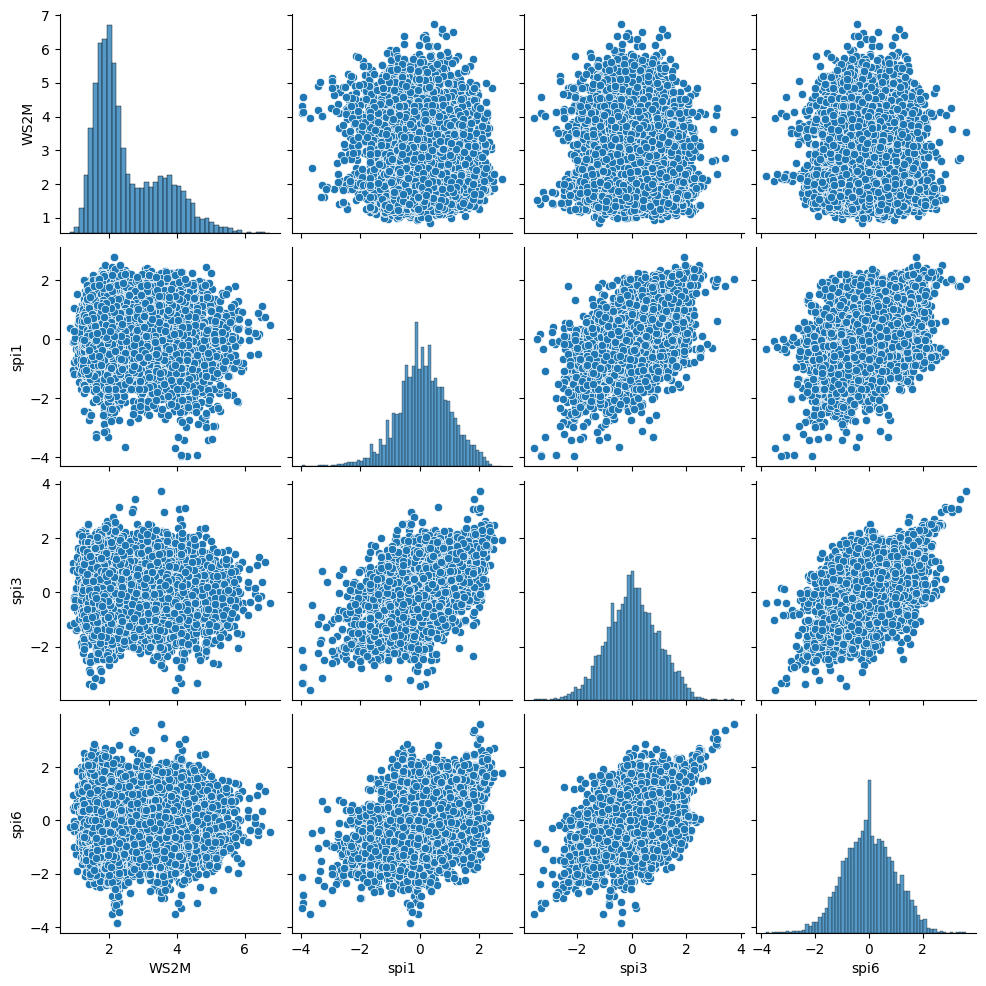

In [ ]:
sns.pairplot(climate_data[['WS2M', 'spi1', 'spi3', 'spi6']])

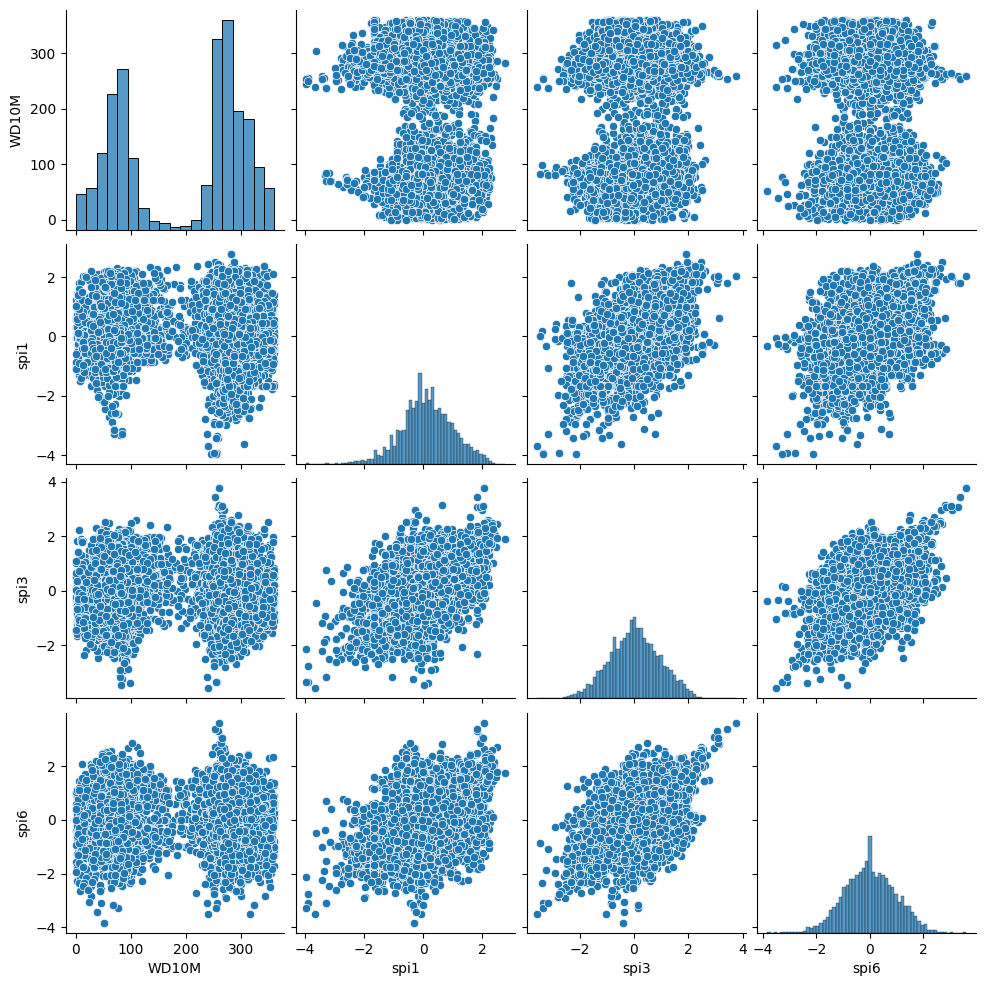

In [ ]:
sns.pairplot(climate_data[['WD10M', 'spi1', 'spi3', 'spi6']])

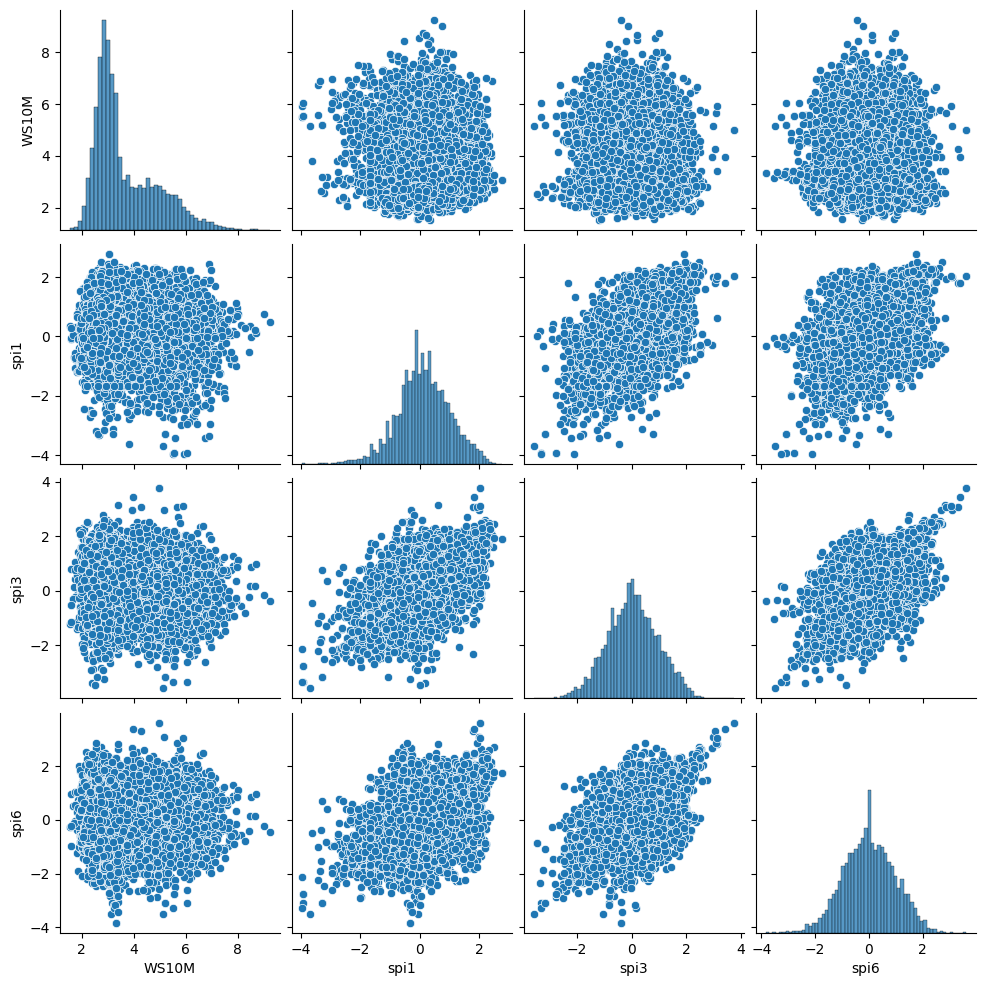

In [ ]:
sns.pairplot(climate_data[['WS10M', 'spi1', 'spi3', 'spi6']])

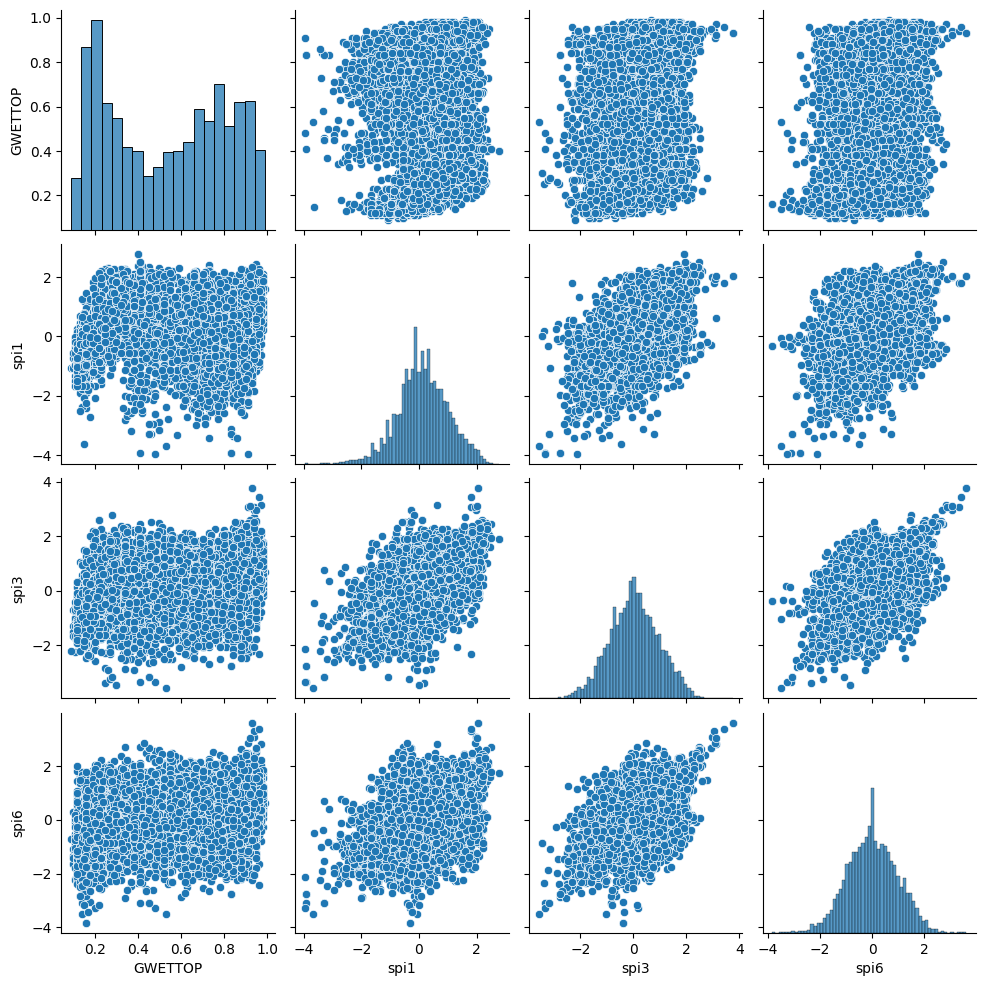

In [ ]:
sns.pairplot(climate_data[['GWETTOP', 'spi1', 'spi3', 'spi6']])

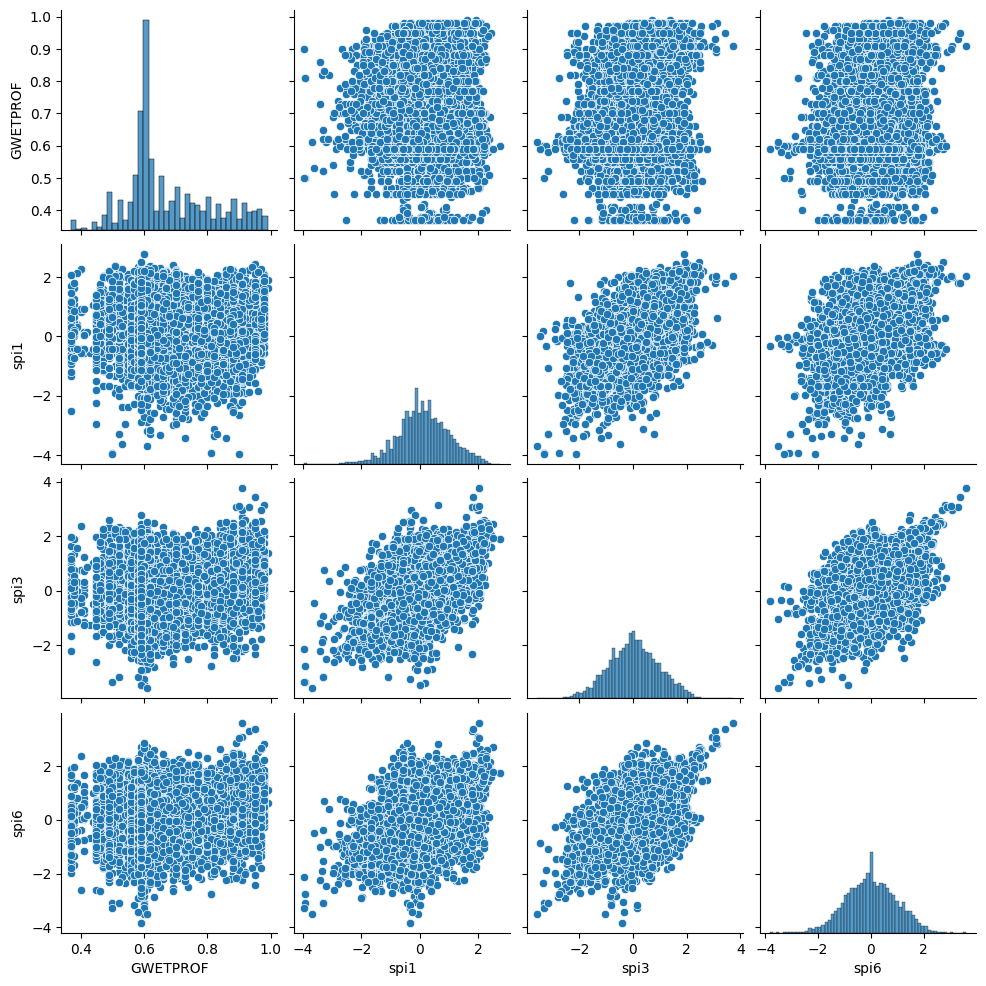

In [ ]:
sns.pairplot(climate_data[['GWETPROF', 'spi1', 'spi3', 'spi6']])

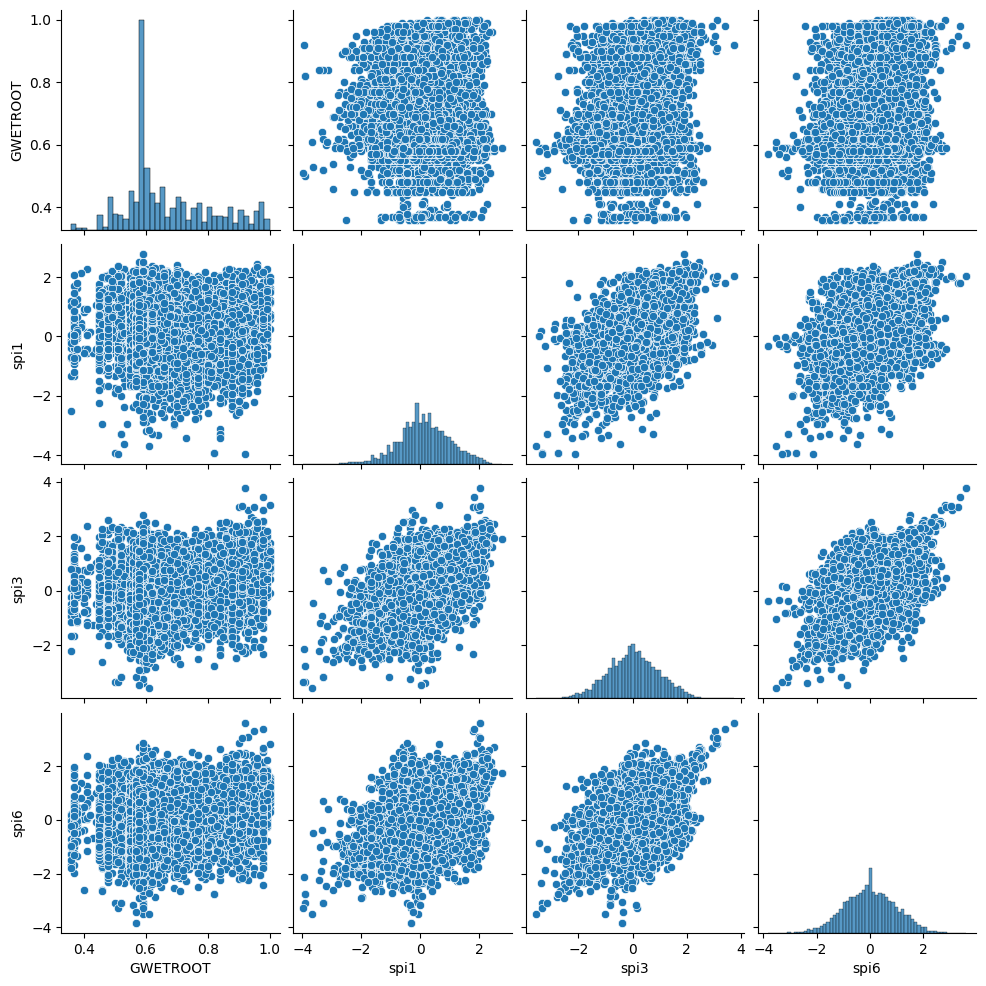

In [ ]:
sns.pairplot(climate_data[['GWETROOT', 'spi1', 'spi3', 'spi6']])

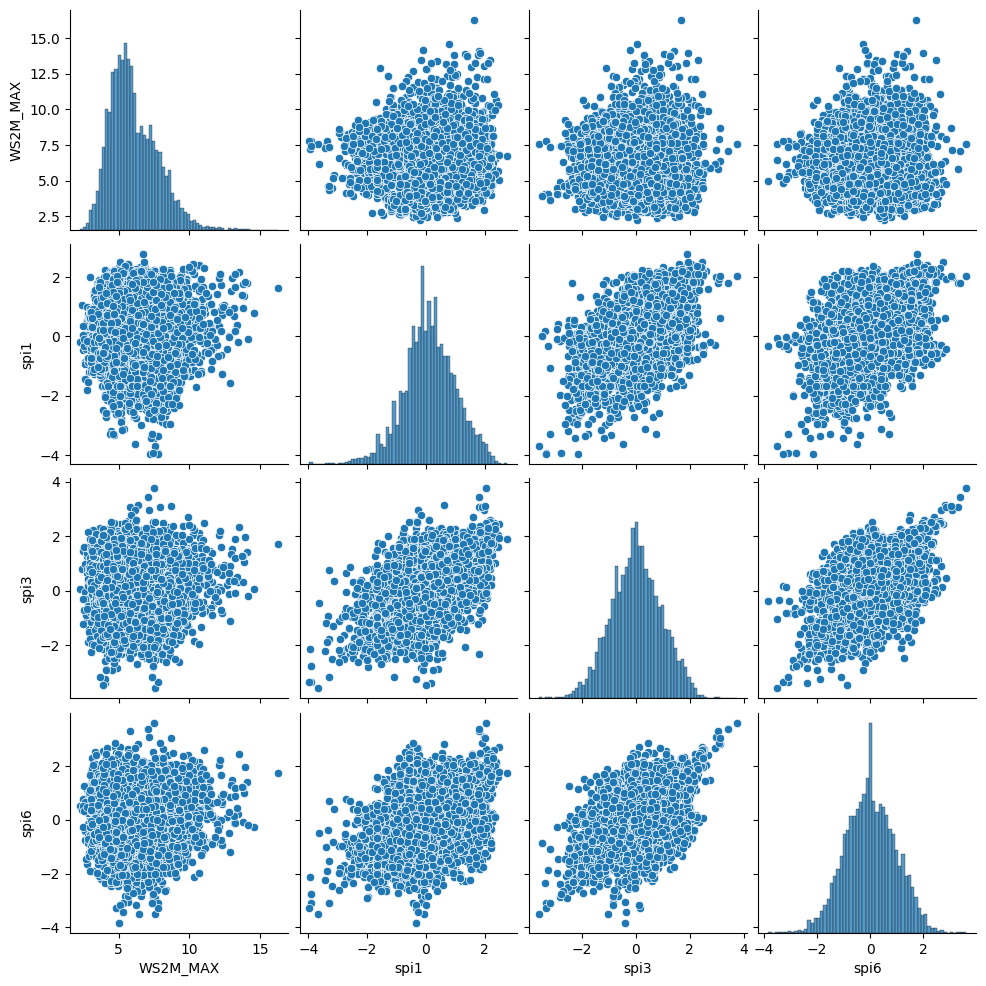

In [ ]:
sns.pairplot(climate_data[['WS2M_MAX', 'spi1', 'spi3', 'spi6']])

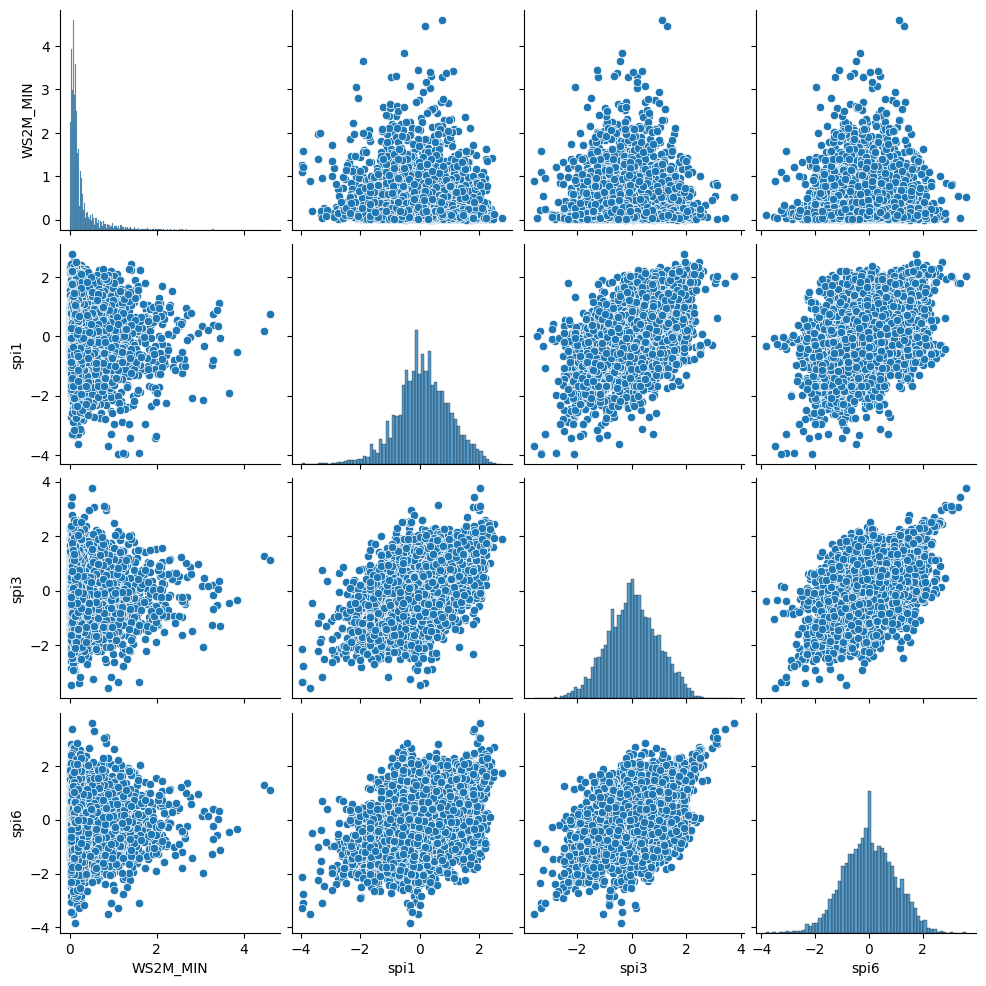

In [ ]:
sns.pairplot(climate_data[['WS2M_MIN', 'spi1', 'spi3', 'spi6']])

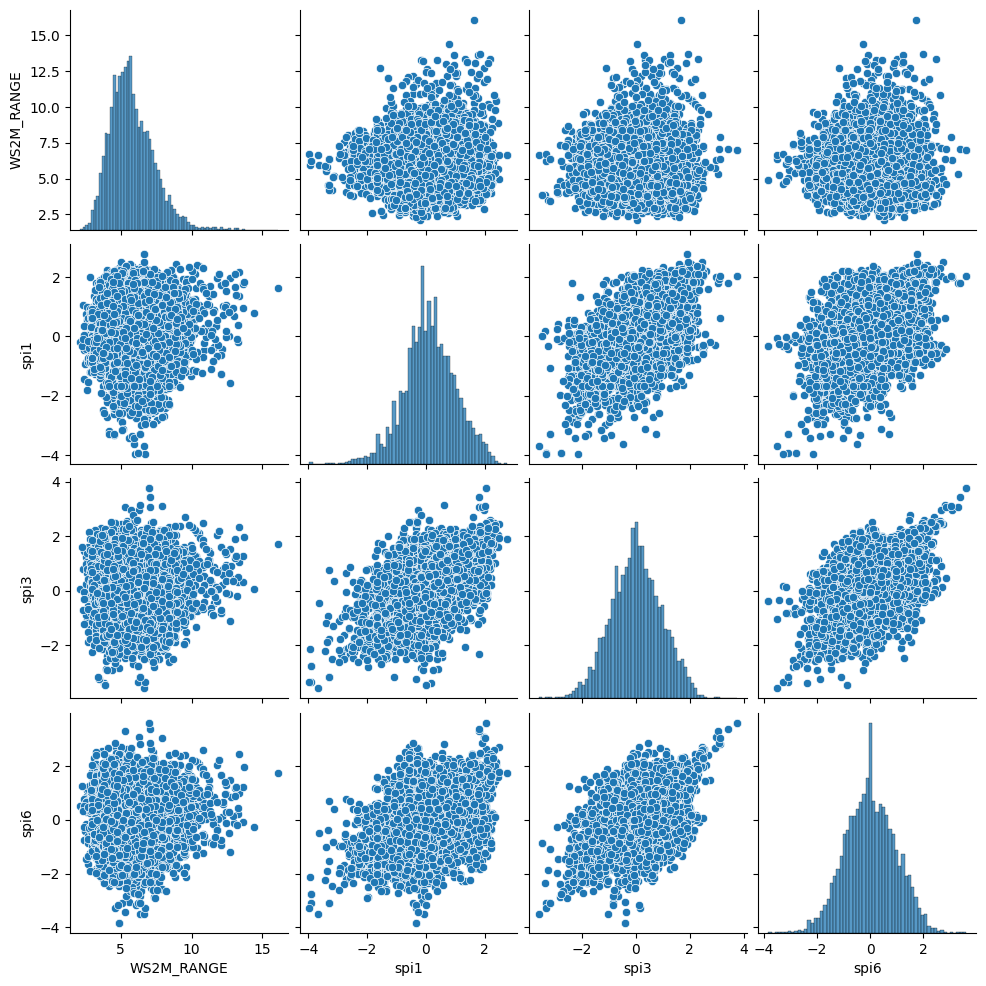

In [ ]:
sns.pairplot(climate_data[['WS2M_RANGE', 'spi1', 'spi3', 'spi6']])

In [ ]:
climate_data.columns

Index(['year_month', 'PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M',
       'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
       'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE',
       'PRECTOTCORR_SUM', 'district', 'month_number', 'day_number', 'year',
       'date', 'month_name', 'year_month_formatted', 'spi1', 'spi1_color',
       'spi1_drought_category', 'spi3', 'spi3_color', 'spi3_drought_category',
       'spi6', 'spi6_color', 'spi6_drought_category'],
      dtype='object')

## Correlation Matrix for SPI

In [ ]:
# corr_matrix_pearson = climate_data[['PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M',
#        'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
#        'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE','spi1', 'spi3', 'spi6']].corr(method='pearson')

# plt.figure(figsize=(18,12))

# # Create the heatmap using the `heatmap` function of Seaborn
# sns.heatmap(corr_matrix_pearson, annot=True)

# # Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
# plt.show()

# corr_matrix_spearman = climate_data[['PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M',
#        'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
#        'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE','spi1', 'spi3', 'spi6']].corr(method='spearman')

# plt.figure(figsize=(18,12))

# # Create the heatmap using the `heatmap` function of Seaborn
# sns.heatmap(corr_matrix_spearman, annot=True)

# # Display the heatmap using the `show` method of the `pyplot` module from matplotlib.
# plt.show()

<Axes: xlabel='GWETTOP', ylabel='GWETPROF'>

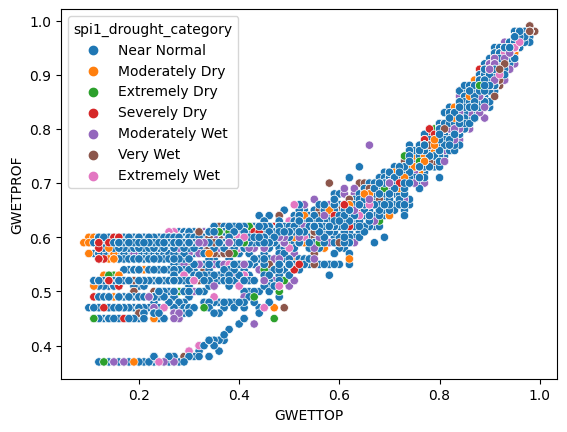

In [ ]:
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETPROF", hue="spi1_drought_category")

<Axes: xlabel='GWETTOP', ylabel='GWETROOT'>

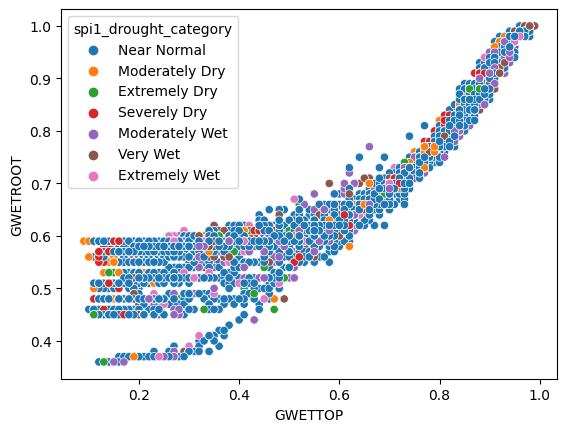

In [ ]:
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETROOT", hue="spi1_drought_category")

<Axes: xlabel='GWETROOT', ylabel='GWETPROF'>

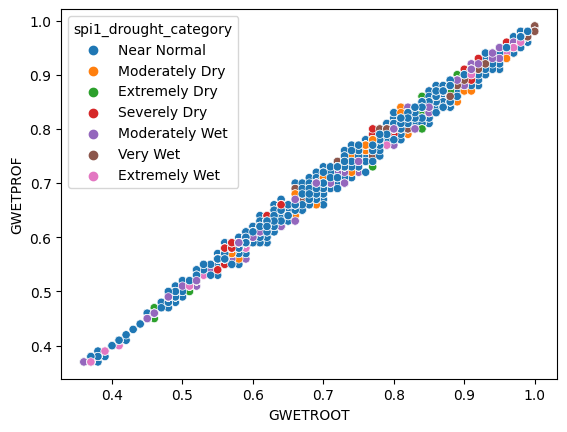

In [ ]:
sns.scatterplot(data=climate_data, x="GWETROOT", y="GWETPROF", hue="spi1_drought_category")

<Axes: xlabel='GWETROOT', ylabel='GWETPROF'>

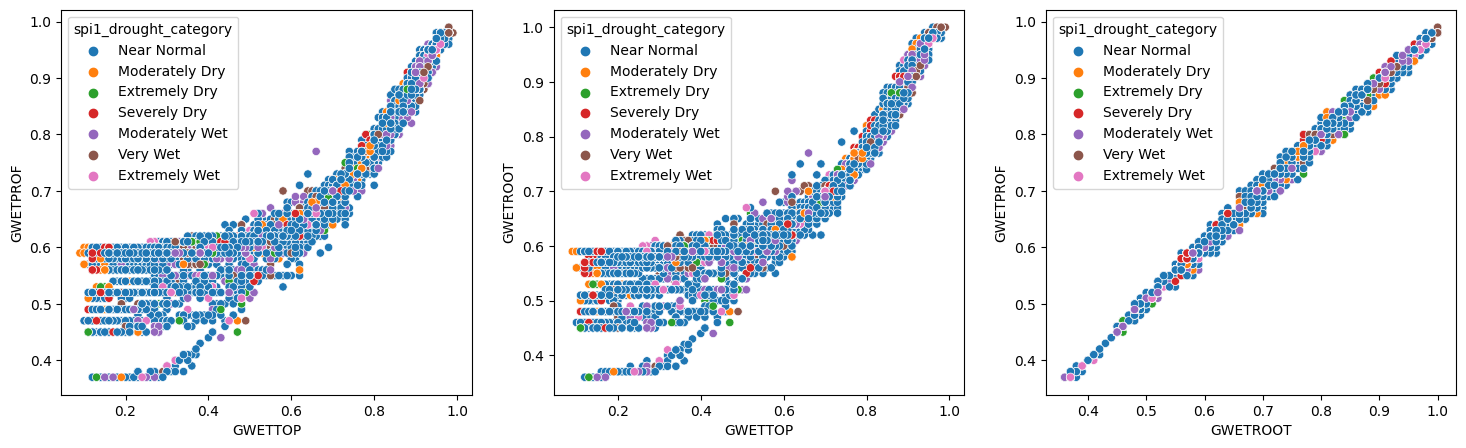

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#create boxplot in each subplot
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETPROF", hue="spi1_drought_category", ax=axes[0])
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETROOT", hue="spi1_drought_category", ax=axes[1])
sns.scatterplot(data=climate_data, x="GWETROOT", y="GWETPROF", hue="spi1_drought_category", ax=axes[2])

<Axes: xlabel='GWETROOT', ylabel='GWETPROF'>

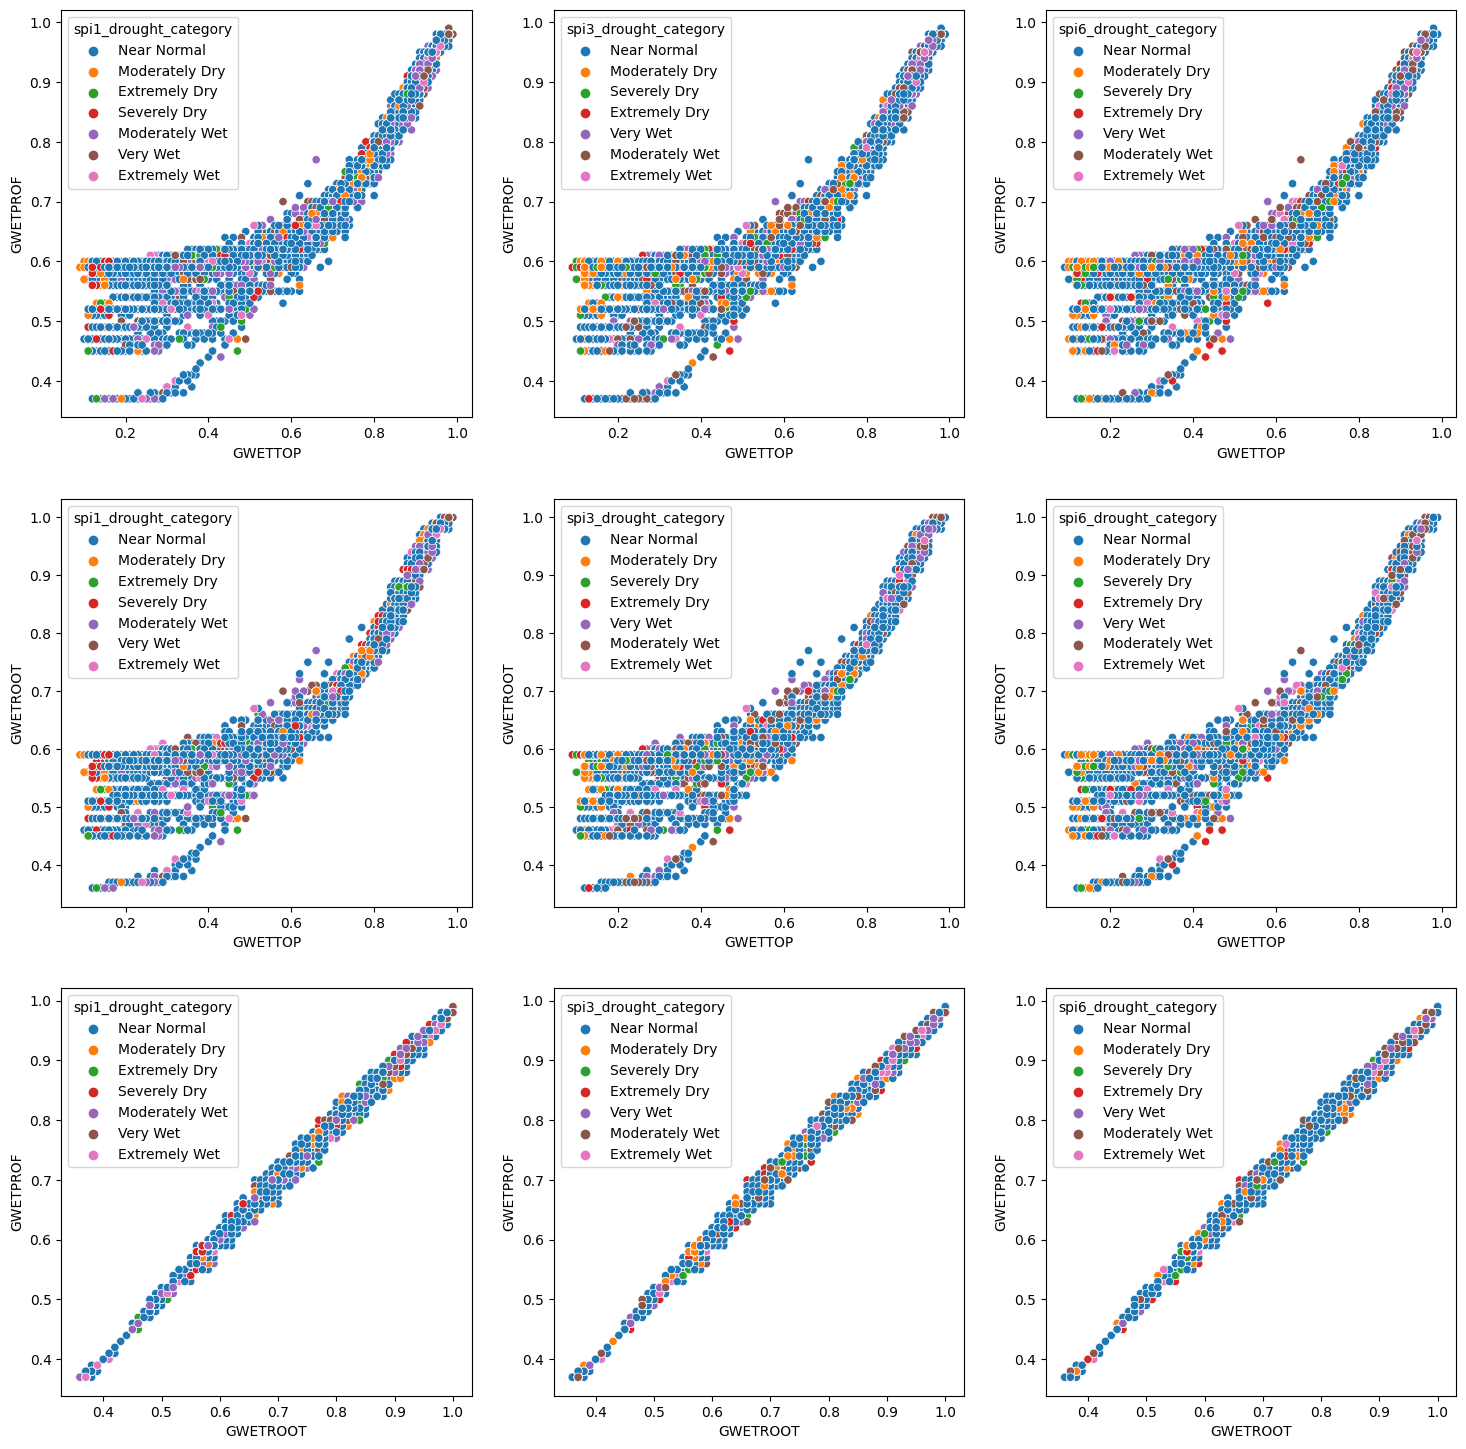

In [ ]:
# plt.figure(figsize=(18,12))
# define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

#create boxplot in each subplot
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETPROF", hue="spi1_drought_category", ax=axes[0,0])
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETROOT", hue="spi1_drought_category", ax=axes[1,0])
sns.scatterplot(data=climate_data, x="GWETROOT", y="GWETPROF", hue="spi1_drought_category", ax=axes[2,0])

sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETPROF", hue="spi3_drought_category", ax=axes[0,1])
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETROOT", hue="spi3_drought_category", ax=axes[1,1])
sns.scatterplot(data=climate_data, x="GWETROOT", y="GWETPROF", hue="spi3_drought_category", ax=axes[2,1])

sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETPROF", hue="spi6_drought_category", ax=axes[0,2])
sns.scatterplot(data=climate_data, x="GWETTOP", y="GWETROOT", hue="spi6_drought_category", ax=axes[1,2])
sns.scatterplot(data=climate_data, x="GWETROOT", y="GWETPROF", hue="spi6_drought_category", ax=axes[2,2])

In [ ]:
correlation_plot = climate_data[['PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M',
       'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
       'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE','spi1', 'spi3', 'spi6']].corr(method='pearson')

correlation_plot.style.background_gradient(cmap = 'RdYlGn')

In [ ]:
climate_data['spi1_drought_category'].value_counts()

Near Normal       6702
Moderately Wet     849
Moderately Dry     499
Very Wet           441
Severely Dry       229
Extremely Dry      210
Extremely Wet      142
Name: spi1_drought_category, dtype: int64

# Splitting into Features and Target Variable

In [ ]:
climate_data.columns

Index(['year_month', 'PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M',
       'GWETTOP', 'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
       'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE',
       'PRECTOTCORR_SUM', 'district', 'month_number', 'day_number', 'year',
       'date', 'month_name', 'year_month_formatted', 'spi1', 'spi1_color',
       'spi1_drought_category', 'spi3', 'spi3_color', 'spi3_drought_category',
       'spi6', 'spi6_color', 'spi6_drought_category'],
      dtype='object')

In [ ]:
final_dataset = climate_data.drop(columns=['year_month', 'district', 'month_number', 'day_number', 'year', 'date', 'month_name', 'year_month_formatted',
                                   'spi1', 'spi1_color', 'spi3', 'spi3_color', 'spi6', 'spi6_color'], axis=1)

final_dataset.columns

Index(['PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M', 'GWETTOP',
       'GWETPROF', 'GWETROOT', 'WS2M_MAX', 'WS2M_MIN', 'WS10M_MAX',
       'WS10M_MIN', 'WS2M_RANGE', 'PRECTOTCORR', 'WS10M_RANGE',
       'PRECTOTCORR_SUM', 'spi1_drought_category', 'spi3_drought_category',
       'spi6_drought_category'],
      dtype='object')

## Target variable Encoding into Numerical format

In [ ]:
# Target Variable Encoding
drought_mapping = {'Extremely Wet': 0, 'Very Wet': 1, 'Moderately Wet': 2, 'Near Normal': 3,
                   'Moderately Dry': 4, 'Severely Dry': 5, 'Extremely Dry': 6}

In [ ]:
final_dataset['spi1_drought_category'] = final_dataset['spi1_drought_category'].map(lambda x: drought_mapping[x])
final_dataset['spi3_drought_category'] = final_dataset['spi3_drought_category'].map(lambda x: drought_mapping[x])
final_dataset['spi6_drought_category'] = final_dataset['spi6_drought_category'].map(lambda x: drought_mapping[x])

target1 = final_dataset['spi1_drought_category']
target3 = final_dataset['spi3_drought_category']
target6 = final_dataset['spi6_drought_category']

In [ ]:
final_dataset.head()

PS   QV2M   RH2M    WD2M  WS2M   WD10M  WS10M  GWETTOP  GWETPROF  \
0  94.46   5.68  34.00   81.75  1.52   76.00   2.37     0.30       0.6   
1  94.37   3.72  20.81  327.81  1.87  331.56   2.89     0.16       0.6   
2  94.26   6.47  31.31  284.75  2.63  286.69   3.66     0.14       0.6   
3  94.14   7.45  26.31  345.19  2.10  343.81   2.90     0.18       0.6   
4  93.89  11.47  42.81  272.44  4.43  272.44   5.75     0.17       0.6   

   GWETROOT  ...  WS2M_MIN  WS10M_MAX  WS10M_MIN  WS2M_RANGE  PRECTOTCORR  \
0      0.59  ...      0.21       4.84       0.30        3.54         0.01   
1      0.59  ...      0.08       6.53       0.09        4.63         0.00   
2      0.59  ...      0.16       7.84       0.28        5.84         0.03   
3      0.59  ...      0.02       6.83       0.02        5.00         0.16   
4      0.59  ...      0.48       9.60       0.54        6.72         0.18   

   WS10M_RANGE  PRECTOTCORR_SUM  spi1_drought_category  spi3_drought_category  \
0         4.55              0.0                      3                      3   
1         6.45              0.0                      3                      3   
2         7.55              0.0                      3                      3   
3         6.81              0.0                      3                      3   
4         9.06              0.0                      3                      3   

   spi6_drought_category  
0                      3  
1                      3  
2                      3  
3                      3  
4                      3  

[5 rows x 21 columns]

In [ ]:
independent_variables = final_dataset.drop(columns=['spi1_drought_category', 'spi3_drought_category', 'spi6_drought_category'], axis=1)

In [ ]:
independent_variables.head()

PS   QV2M   RH2M    WD2M  WS2M   WD10M  WS10M  GWETTOP  GWETPROF  \
0  94.46   5.68  34.00   81.75  1.52   76.00   2.37     0.30       0.6   
1  94.37   3.72  20.81  327.81  1.87  331.56   2.89     0.16       0.6   
2  94.26   6.47  31.31  284.75  2.63  286.69   3.66     0.14       0.6   
3  94.14   7.45  26.31  345.19  2.10  343.81   2.90     0.18       0.6   
4  93.89  11.47  42.81  272.44  4.43  272.44   5.75     0.17       0.6   

   GWETROOT  WS2M_MAX  WS2M_MIN  WS10M_MAX  WS10M_MIN  WS2M_RANGE  \
0      0.59      3.75      0.21       4.84       0.30        3.54   
1      0.59      4.71      0.08       6.53       0.09        4.63   
2      0.59      6.00      0.16       7.84       0.28        5.84   
3      0.59      5.02      0.02       6.83       0.02        5.00   
4      0.59      7.20      0.48       9.60       0.54        6.72   

   PRECTOTCORR  WS10M_RANGE  PRECTOTCORR_SUM  
0         0.01         4.55              0.0  
1         0.00         6.45              0.0  
2         0.03         7.55              0.0  
3         0.16         6.81              0.0  
4         0.18         9.06              0.0

In [ ]:
target1.unique(), target3.unique(), target6.unique()

(array([3, 4, 6, 5, 2, 1, 0]),
 array([3, 4, 5, 6, 1, 2, 0]),
 array([3, 4, 5, 6, 1, 2, 0]))

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(independent_variables, target1, test_size=0.2, random_state=0, stratify=target1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(independent_variables, target3, test_size=0.2, random_state=0, stratify=target3)
X_train6, X_test6, y_train6, y_test6 = train_test_split(independent_variables, target6, test_size=0.2, random_state=0, stratify=target6)

In [ ]:
print("Train features shape", X_train1.shape)
print("Train target shape", y_train1.shape)
print("Test features shape", X_test1.shape)
print("Test target shape", y_test1.shape)

Train features shape (7257, 18)
Train target shape (7257,)
Test features shape (1815, 18)
Test target shape (1815,)


# Feature Transformation

In [ ]:
sc = StandardScaler()

X_train1 = sc.fit_transform(X_train1)

X_test1 = sc.transform(X_test1)

X_train1

array([[-1.47020446,  0.90456099,  1.24855887, ...,  0.27638179,
        -0.50305037,  0.14467504],
       [ 1.27214273,  0.08670187,  0.40751134, ..., -0.60496732,
        -0.26170877, -0.58717966],
       [ 1.47452998,  0.1861438 , -0.11670926, ..., -0.60496732,
        -0.50305037, -0.58717966],
       ...,
       [-0.58476026, -1.20198435, -1.64171465, ..., -0.5845893 ,
        -0.50305037, -0.56714026],
       [ 0.86736824,  1.48497715,  1.22914329, ...,  5.08729126,
         2.89050813,  4.94547312],
       [ 0.35634044,  0.12323156,  0.29984313, ..., -0.58119297,
        -0.65573588, -0.55792546]])

# Feature Selection

In [ ]:
model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train1, y_train1)

print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

selected_features = independent_variables.columns[(fit.get_support())]

print(selected_features)

Num Features: 15
Selected Features: [ True  True  True  True  True  True  True  True  True False  True False
  True  True False  True  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 4 1 3 1 1 2 1 1 1]
Index(['PS', 'QV2M', 'RH2M', 'WD2M', 'WS2M', 'WD10M', 'WS10M', 'GWETTOP',
       'GWETPROF', 'WS2M_MAX', 'WS10M_MAX', 'WS10M_MIN', 'PRECTOTCORR',
       'WS10M_RANGE', 'PRECTOTCORR_SUM'],
      dtype='object')


In [ ]:
set(independent_variables.columns)- set(selected_features)

{'GWETROOT', 'WS2M_MIN', 'WS2M_RANGE'}

In [ ]:
# Removing the Features
independent_variables = independent_variables.drop(columns=['GWETROOT', 'WS2M_MIN', 'WS2M_RANGE'], axis=1)
independent_variables.head()

PS   QV2M   RH2M    WD2M  WS2M   WD10M  WS10M  GWETTOP  GWETPROF  \
0  94.46   5.68  34.00   81.75  1.52   76.00   2.37     0.30       0.6   
1  94.37   3.72  20.81  327.81  1.87  331.56   2.89     0.16       0.6   
2  94.26   6.47  31.31  284.75  2.63  286.69   3.66     0.14       0.6   
3  94.14   7.45  26.31  345.19  2.10  343.81   2.90     0.18       0.6   
4  93.89  11.47  42.81  272.44  4.43  272.44   5.75     0.17       0.6   

   WS2M_MAX  WS10M_MAX  WS10M_MIN  PRECTOTCORR  WS10M_RANGE  PRECTOTCORR_SUM  
0      3.75       4.84       0.30         0.01         4.55              0.0  
1      4.71       6.53       0.09         0.00         6.45              0.0  
2      6.00       7.84       0.28         0.03         7.55              0.0  
3      5.02       6.83       0.02         0.16         6.81              0.0  
4      7.20       9.60       0.54         0.18         9.06              0.0

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(independent_variables, target1, test_size=0.2, random_state=0, stratify=target1)
X_train3, X_test3, y_train3, y_test3 = train_test_split(independent_variables, target3, test_size=0.2, random_state=0, stratify=target3)
X_train6, X_test6, y_train6, y_test6 = train_test_split(independent_variables, target6, test_size=0.2, random_state=0, stratify=target6)

print("Train features shape", X_train1.shape)
print("Train target shape", y_train1.shape)
print("Test features shape", X_test1.shape)
print("Test target shape", y_test1.shape)

Train features shape (7257, 15)
Train target shape (7257,)
Test features shape (1815, 15)
Test target shape (1815,)


# SPI 1-Month Analysis and Modeling

## PCA

In [ ]:
pca = PCA()
X_train1_PCA = pca.fit_transform(X_train1)
print(pca.explained_variance_ratio_)

[6.54869214e-01 3.31786597e-01 7.38689936e-03 5.68360991e-03
 1.55879552e-04 6.69053751e-05 3.01308472e-05 1.66563580e-05
 2.60862716e-06 6.40489476e-07 5.81790721e-07 2.05519192e-07
 4.19971217e-08 2.89886954e-08 1.46938418e-10]


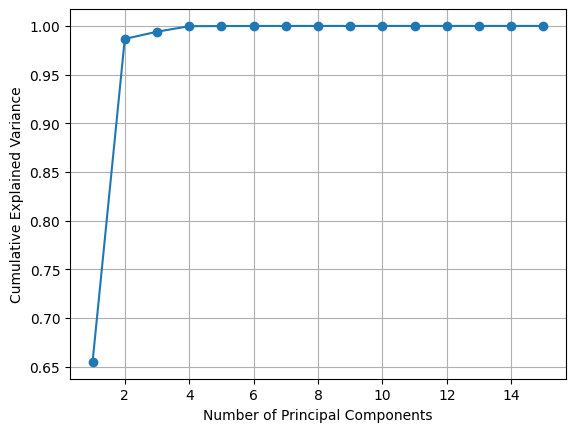

In [ ]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

plt.plot(np.arange(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
# plt.show()

In [ ]:
# Choosing "n" value that explains > 90% variance
pca = PCA(n_components=5)

X_train1_PCA = pca.fit_transform(X_train1)
X_test1_PCA = pca.transform(X_test1)

In [ ]:
print(pca.explained_variance_ratio_)

[6.54869214e-01 3.31786597e-01 7.38689936e-03 5.68360991e-03
 1.55879552e-04]


## Random Forests

In [ ]:
randomForestClassifier1 = RandomForestClassifier()

randomForestClassifier1.fit(X_train1_PCA, y_train1)

y_pred1 = randomForestClassifier1.predict(X_test1)

In [ ]:
print('Performance of Decision Tree Algorithm without resampling:\n')
print(confusion_matrix(y_test1, y_pred1))

print(classification_report(y_test1, y_pred1))

print('Accuracy:',accuracy_score(y_test1, y_pred1))

print('Precision:',precision_score(y_test1, y_pred1, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1, average='weighted'))

Performance of Decision Tree Algorithm without resampling:

[[  0   0  12  16   0   0   0]
 [  0   0  40  48   0   0   0]
 [  0   0  75  95   0   0   0]
 [  0   2 437 902   0   0   0]
 [  0   0  26  74   0   0   0]
 [  0   0  17  29   0   0   0]
 [  0   0  19  23   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        88
           2       0.12      0.44      0.19       170
           3       0.76      0.67      0.71      1341
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        42

    accuracy                           0.54      1815
   macro avg       0.13      0.16      0.13      1815
weighted avg       0.57      0.54      0.54      1815

Accuracy: 0.5382920110192837
Precision: 0.5726676823581743
Recall: 0.5382920110192837
F1 Score: 0.5448941932173683


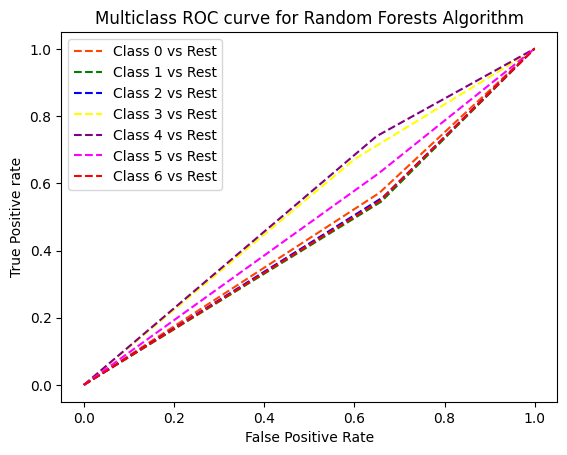

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Random Forests Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Hyperparamater Tuning

In [ ]:
param_grid = {
    'n_estimators': [25, 50],      # Number of trees in the forest
    'max_depth': [5, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required to be at a leaf node
}

# Create a random forest classifier
rf1 = RandomForestClassifier()

# Use random search to find the best hyperparameters
grid_search = GridSearchCV(rf1, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring = "accuracy")

# Fit the random search object to the data
grid_search.fit(X_train1_PCA, y_train1)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [25, 50]},
             scoring='accuracy', verbose=2)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
36       0.735328      0.018921         0.019648        0.000549   
37       2.457327      0.382454         0.089382        0.006063   
39       1.583574      0.149812         0.036537        0.001007   
43       1.415954      0.010160         0.036014        0.000871   
45       2.593178      0.143027         0.078413        0.002904   

   param_max_depth param_min_samples_leaf param_min_samples_split  \
36              20                      1                       2   
37              20                      1                       2   
39              20                      1                       5   
43              20                      2                       2   
45              20                      2                       5   

   param_n_estimators                                             params  \
36                 25  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
37                 50  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
39                 50  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...   
43                 50  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   
45                 50  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...   

    split0_test_score  split1_test_score  split2_test_score  mean_test_score  \
36           0.799917           0.791236           0.794543         0.795232   
37           0.792063           0.793303           0.791236         0.792201   
39           0.791236           0.791236           0.787929         0.790134   
43           0.791236           0.789996           0.783382         0.788204   
45           0.787929           0.785035           0.784622         0.785862   

    std_test_score  rank_test_score  
36        0.003577                1  
37        0.000849                2  
39        0.001559                3  
43        0.003448                4  
45        0.001471                5

In [ ]:
ht_params = score_df.nlargest(1,"mean_test_score")['params']

In [ ]:
for i in ht_params:
    print(i)

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 25}


In [ ]:
randomForestClassifier1 = RandomForestClassifier(max_depth= 20,
                                                 min_samples_leaf= 1,
                                                 min_samples_split= 2,
                                                 n_estimators= 25)

randomForestClassifier1.fit(X_train1_PCA, y_train1)

y_pred1 = randomForestClassifier1.predict(X_test1)

In [ ]:
print('Performance of Random Forest Algorithm\n')
print(confusion_matrix(y_test1, y_pred1))

print(classification_report(y_test1, y_pred1))

print('Accuracy:',accuracy_score(y_test1, y_pred1))

print('Precision:',precision_score(y_test1, y_pred1, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1, average='weighted'))

Performance of Random Forest Algorithm

[[  0   0  27   1   0   0   0]
 [  0   0  76  12   0   0   0]
 [  0   0 151  19   0   0   0]
 [  0   0 858 483   0   0   0]
 [  0   0  69  31   0   0   0]
 [  0   0  31  15   0   0   0]
 [  0   0  32  10   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        88
           2       0.12      0.89      0.21       170
           3       0.85      0.36      0.51      1341
           4       0.00      0.00      0.00       100
           5       0.00      0.00      0.00        46
           6       0.00      0.00      0.00        42

    accuracy                           0.35      1815
   macro avg       0.14      0.18      0.10      1815
weighted avg       0.64      0.35      0.39      1815

Accuracy: 0.3493112947658402
Precision: 0.6363449291901917
Recall: 0.3493112947658402
F1 Score: 0.3932903269678161


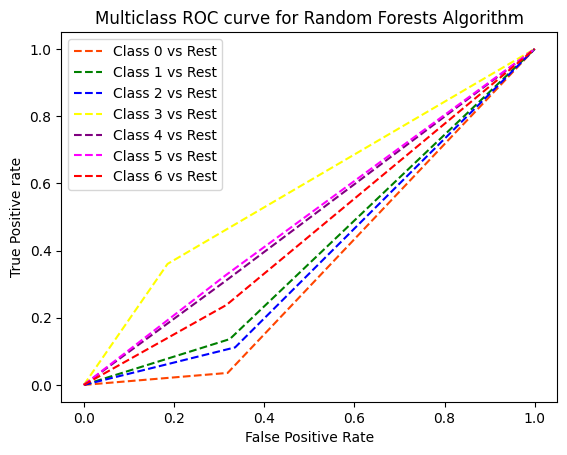

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Random Forests Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logisticRegression1 = LogisticRegression()

logisticRegression1.fit(X_train1_PCA, y_train1)

y_pred1_lr = logisticRegression1.predict(X_test1)

In [ ]:
print('Performance of Logistic Regression Algorithm\n')
print(confusion_matrix(y_test1, y_pred1_lr))

print(classification_report(y_test1, y_pred1_lr))

print('Accuracy:',accuracy_score(y_test1, y_pred1_lr))

print('Precision:',precision_score(y_test1, y_pred1_lr, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1_lr, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1_lr, average='weighted'))

Performance of Logistic Regression Algorithm

[[  0   0   0   9   0  19   0]
 [  1   0   0  36   0  51   0]
 [  2   0   0  78   0  90   0]
 [  6   0   0 594   0 741   0]
 [  0   0   0  26   0  74   0]
 [  0   0   0   3   0  43   0]
 [  0   0   0  14   0  28   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00       170
           3       0.78      0.44      0.57      1341
           4       0.00      0.00      0.00       100
           5       0.04      0.93      0.08        46
           6       0.00      0.00      0.00        42

    accuracy                           0.35      1815
   macro avg       0.12      0.20      0.09      1815
weighted avg       0.58      0.35      0.42      1815

Accuracy: 0.3509641873278237
Precision: 0.5785059954850544
Recall: 0.3509641873278237
F1 Score: 0.41977106927130725


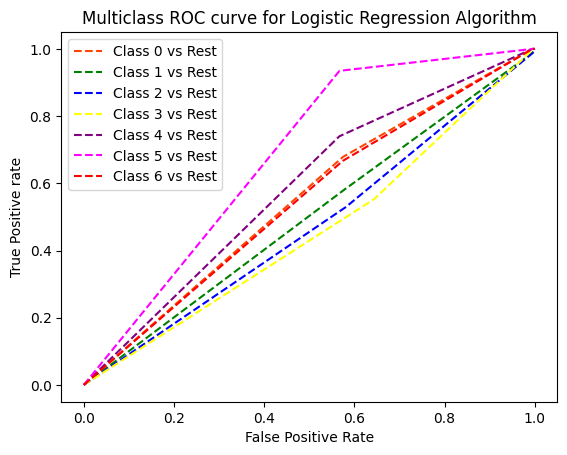

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1_lr, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Logistic Regression Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Hyperparameter Tuning

In [ ]:
# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression()

# Define a range of hyperparameters for tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter C
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [50, 100]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=logreg_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the model with different combinations of hyperparameters
grid_search.fit(X_train1_PCA, y_train1)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
22       0.288596      0.012597         0.002554        0.000575       1   
38       0.276951      0.006193         0.001901        0.000129     100   
11       0.431292      0.055156         0.002324        0.000530     0.1   
3        0.601214      0.043322         0.004256        0.004579    0.01   
7        0.356124      0.036574         0.002047        0.000092    0.01   

   param_max_iter param_penalty param_solver  \
22            100            l2        lbfgs   
38            100            l2        lbfgs   
11             50            l2    liblinear   
3              50            l2    liblinear   
7             100            l2    liblinear   

                                               params  split0_test_score  \
22  {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'so...           0.739669   
38  {'C': 100, 'max_iter': 100, 'penalty': 'l2', '...           0.739669   
11  {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 's...           0.739669   
3   {'C': 0.01, 'max_iter': 50, 'penalty': 'l2', '...           0.738981   
7   {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', ...           0.738981   

    split1_test_score  split2_test_score  split3_test_score  \
22           0.738292           0.738112           0.740179   
38           0.738292           0.738112           0.739490   
11           0.738981           0.738801           0.738801   
3            0.738981           0.738801           0.738801   
7            0.738981           0.738801           0.738801   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
22           0.740179         0.739286        0.000907                1  
38           0.740868         0.739286        0.001006                2  
11           0.739490         0.739148        0.000363                3  
3            0.739490         0.739011        0.000253                4  
7            0.739490         0.739011        0.000253                4

In [ ]:
logisticRegression1 = LogisticRegression(C= 1,
                                         max_iter = 100,
                                         penalty = 'l2',
                                         solver = 'lbfgs')

logisticRegression1.fit(X_train1_PCA, y_train1)

y_pred1_lr_ht = logisticRegression1.predict(X_test1)

In [ ]:
print('Performance of Logistic Regression Algorithm\n')
print(confusion_matrix(y_test1, y_pred1_lr_ht))

print(classification_report(y_test1, y_pred1_lr_ht))

print('Accuracy:',accuracy_score(y_test1, y_pred1_lr_ht))

print('Precision:',precision_score(y_test1, y_pred1_lr_ht, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1_lr_ht, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1_lr_ht, average='weighted'))

Performance of Logistic Regression Algorithm

[[  0   0   0   9   0  19   0]
 [  1   0   0  36   0  51   0]
 [  2   0   0  78   0  90   0]
 [  6   0   0 594   0 741   0]
 [  0   0   0  26   0  74   0]
 [  0   0   0   3   0  43   0]
 [  0   0   0  14   0  28   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00       170
           3       0.78      0.44      0.57      1341
           4       0.00      0.00      0.00       100
           5       0.04      0.93      0.08        46
           6       0.00      0.00      0.00        42

    accuracy                           0.35      1815
   macro avg       0.12      0.20      0.09      1815
weighted avg       0.58      0.35      0.42      1815

Accuracy: 0.3509641873278237
Precision: 0.5785059954850544
Recall: 0.3509641873278237
F1 Score: 0.41977106927130725


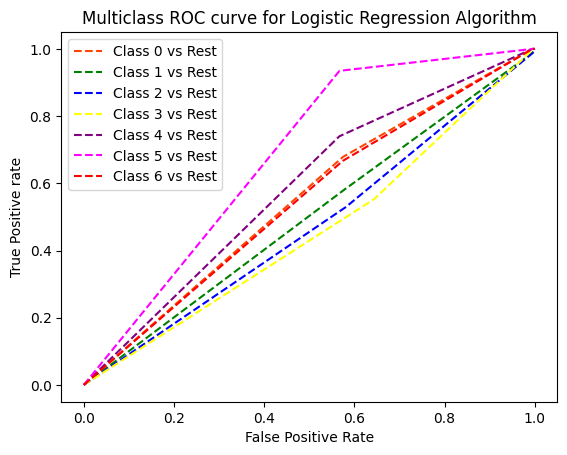

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1_lr_ht, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Logistic Regression Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Neural Networks

In [ ]:
mlpclassifier1 = MLPClassifier()

mlpclassifier1.fit(X_train1_PCA, y_train1)

y_pred1_mlp = mlpclassifier1.predict(X_test1)

In [ ]:
print('Performance of Logistic Regression Algorithm\n')
print(confusion_matrix(y_test1, y_pred1_mlp))

print(classification_report(y_test1, y_pred1_mlp))

print('Accuracy:',accuracy_score(y_test1, y_pred1_mlp))

print('Precision:',precision_score(y_test1, y_pred1_mlp, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1_mlp, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1_mlp, average='weighted'))

Performance of Logistic Regression Algorithm

[[  0   0   0   0   0  28   0]
 [  2   0   0   2   0  84   0]
 [  2   0   0   5   1 162   0]
 [ 13   3   0 291  41 993   0]
 [  0   0   0  18   2  80   0]
 [  0   0   0   7   0  39   0]
 [  0   0   0   3   1  38   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.00      0.00      0.00        88
           2       0.00      0.00      0.00       170
           3       0.89      0.22      0.35      1341
           4       0.04      0.02      0.03       100
           5       0.03      0.85      0.05        46
           6       0.00      0.00      0.00        42

    accuracy                           0.18      1815
   macro avg       0.14      0.15      0.06      1815
weighted avg       0.66      0.18      0.26      1815

Accuracy: 0.18292011019283747
Precision: 0.6626621946375105
Recall: 0.18292011019283747
F1 Score: 0.2608170800570404


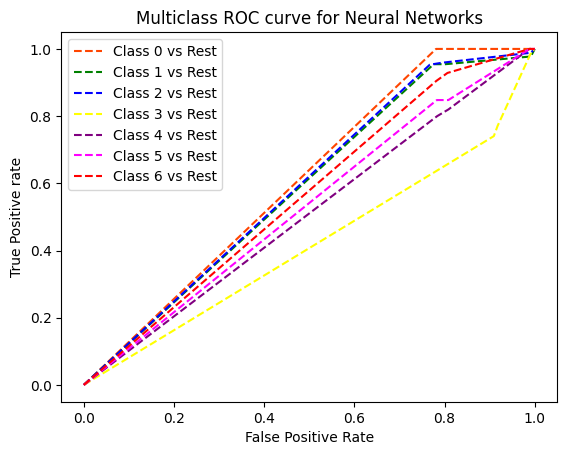

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1_mlp, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Neural Networks')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Hyperparamater Tuning

In [ ]:
# Create an MLP classifier
mlp_classifier = MLPClassifier()

# Define a range of hyperparameters for tuning
param_grid = {
    'activation': ['relu', 'tanh', 'logistic'],  # Activation functions
    'solver': ['adam'],  # Optimization algorithms
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization term
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)

# Fit the model with different combinations of hyperparameters
grid_search.fit(X_train1_PCA, y_train1)

# Get the best hyperparameters from the search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.001, 'solver': 'adam'}


In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4      11.701918      0.351553         0.024688        0.007863   
5      12.235119      0.119640         0.014374        0.000989   
7      11.462817      1.093637         0.009898        0.000685   
6       8.568443      1.042342         0.014047        0.004477   
3      13.557984      2.277362         0.015096        0.000535   

  param_activation param_alpha param_solver  \
4             tanh       0.001         adam   
5             tanh        0.01         adam   
7         logistic       0.001         adam   
6         logistic      0.0001         adam   
3             tanh      0.0001         adam   

                                              params  split0_test_score  \
4  {'activation': 'tanh', 'alpha': 0.001, 'solver...           0.770980   
5  {'activation': 'tanh', 'alpha': 0.01, 'solver'...           0.761472   
7  {'activation': 'logistic', 'alpha': 0.001, 'so...           0.767259   
6  {'activation': 'logistic', 'alpha': 0.0001, 's...           0.766846   
3  {'activation': 'tanh', 'alpha': 0.0001, 'solve...           0.766846   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
4           0.771807           0.764779         0.769188        0.003136   
5           0.770980           0.774287         0.768913        0.005432   
7           0.765606           0.771393         0.768086        0.002434   
6           0.768086           0.768499         0.767810        0.000703   
3           0.763952           0.767259         0.766019        0.001471   

   rank_test_score  
4                1  
5                2  
7                3  
6                4  
3                5

In [ ]:
for i in score_df.nlargest(1,"mean_test_score")['params']:
    print(i)

{'activation': 'tanh', 'alpha': 0.001, 'solver': 'adam'}


In [ ]:
mlpclassifier1 = MLPClassifier(activation= 'tanh', alpha= 0.001, solver= 'adam')

mlpclassifier1.fit(X_train1_PCA, y_train1)

y_pred1_mlp_ht = mlpclassifier1.predict(X_test1)

In [ ]:
print('Performance of Neural Networks Algorithm\n')
print(confusion_matrix(y_test1, y_pred1_mlp_ht))

print(classification_report(y_test1, y_pred1_mlp_ht))

print('Accuracy:',accuracy_score(y_test1, y_pred1_mlp_ht))

print('Precision:',precision_score(y_test1, y_pred1_mlp_ht, average='weighted'))

print('Recall:',recall_score(y_test1, y_pred1_mlp_ht, average='weighted'))

print('F1 Score:',f1_score(y_test1, y_pred1_mlp_ht, average='weighted'))

Performance of Neural Networks Algorithm

[[  0   0   0   0  15   0  13]
 [  1   1   0   1  32   0  53]
 [  2   4   0   0  67   0  97]
 [  5  58   0  22 455   0 801]
 [  1   2   0   2  47   0  48]
 [  1   0   0   0  22   0  23]
 [  0   3   0   0  16   0  23]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.01      0.01      0.01        88
           2       0.00      0.00      0.00       170
           3       0.88      0.02      0.03      1341
           4       0.07      0.47      0.12       100
           5       0.00      0.00      0.00        46
           6       0.02      0.55      0.04        42

    accuracy                           0.05      1815
   macro avg       0.14      0.15      0.03      1815
weighted avg       0.66      0.05      0.03      1815

Accuracy: 0.0512396694214876
Precision: 0.6553574134808965
Recall: 0.0512396694214876
F1 Score: 0.0322568272187653


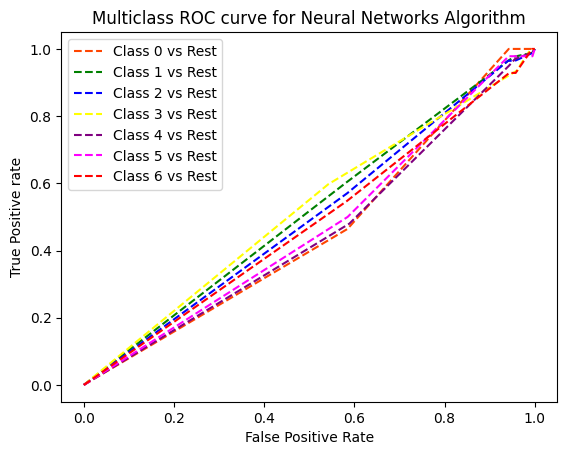

In [ ]:
fpr = dict()
tpr = dict()
thresh = dict()

for i in range(7):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test1, y_pred1_mlp_ht, pos_label=i)

plt.plot(fpr[0], tpr[0], linestyle='--',color='orangered', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='purple', label='Class 4 vs Rest')
plt.plot(fpr[5], tpr[5], linestyle='--',color='magenta', label='Class 5 vs Rest')
plt.plot(fpr[6], tpr[6], linestyle='--',color='red', label='Class 6 vs Rest')

plt.title('Multiclass ROC curve for Neural Networks Algorithm')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')